# Lab 3
---
The main idea of this lab is to use numpy and pandas for the same tasks and compare their working time and make conclusions about when it's more efficient to use pandas or use numpy.

_Thus, in numpy and pandas part done task are identical._

In [2]:
import pandas as pd
import numpy as np

# First part:

## Pandas:

### Reading txt and standardizing:

In [ ]:
%%timeit -n 1
data = (pd.read_csv("data.txt", sep=";", na_values="?")
          .dropna()
          .reset_index()
          .drop(["index"], axis=1))


data["Date"] = pd.to_datetime(arg=data["Date"], format="%d/%m/%Y", dayfirst=True)
data["Time"] = pd.to_datetime(arg=data["Time"], format="%H:%M:%S").dt.time

num_cols = data.columns[2:]
for col in num_cols:
    data[col] = pd.to_numeric(data[col])

data

In [31]:
%%timeit -n 10
data.loc[data["Global_active_power"] > 5]

11.8 ms ± 433 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
%%timeit -n 10
data.loc[data["Voltage"] > 235]

355 ms ± 8.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [35]:
%%timeit -n 10
(data.loc[(data["Global_intensity"] >= 19) & (data["Global_intensity"] <= 20)]
     .loc[data["Sub_metering_2"] > data["Sub_metering_3"]])

30.6 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit -n 10
random = data.sample(n=500000)

In [ ]:
%%timeit -n 10
random.agg({
   "Sub_metering_1": "mean",
   "Sub_metering_2": "mean",
   "Sub_metering_3": "mean",
})

In [ ]:
%%timeit -n 10
from datetime import time
t = time(hour=18)

sec = (random.loc[(random["Time"] > t) & 
            (random["Global_active_power"] > 6) & 
            (random["Sub_metering_2"] > random["Sub_metering_1"]) & 
            (random["Sub_metering_2"] > random["Sub_metering_3"])])



In [ ]:
%%timeit -n 10
#Every third from first half
rows = len(sec)

sec.iloc[:rows//2:3]

In [ ]:
%%timeit -n 10
#Every fourth from second half
sec.iloc[rows//2::4]

## Numpy:

In [191]:
#%%timeit -n 1
import datetime as dt
dtypes = "object, object, float, float, float, float, float, float, float"
data = np.genfromtxt("data.txt", dtype=dtypes, delimiter=";", missing_values="?", names=True, converters={
    "Date": lambda x: dt.datetime.strptime(x.decode("utf-8"), "%d/%m/%Y").date(),
    "Time": lambda x: dt.datetime.strptime(x.decode("utf-8"), "%H:%M:%S").time()
})
       


In [132]:
%%timeit -n 10
data[data["Global_active_power"] > 5]

C:\Users\3P\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


29.3 ms ± 2.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [134]:
%%timeit -n 10
data[data["Voltage"] > 235]

C:\Users\3P\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


1.5 s ± 155 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [135]:
%%timeit -n 10
(data[(data["Global_intensity"] >= 19) & 
      (data["Global_intensity"] <= 20) &
      (data["Sub_metering_2"] > data["Sub_metering_3"])])

C:\Users\3P\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
C:\Users\3P\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  
C:\Users\3P\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


42 ms ± 944 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [188]:
%%timeit -n 10
number_of_rows = data.shape[0]
random_rows = np.random.choice(number_of_rows, size=500000, replace=False)

random = data[:][random_rows]

random

785 ms ± 34.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [178]:
%%timeit -n 1
for i in range(1, 4):
    s = f'Sub_metering_{i}: {np.mean(random[~np.isnan(random[f"Sub_metering_{i}"])][f"Sub_metering_{i}"])}'
    #print(s)

1.48 s ± 80.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [186]:
%%timeit -n 10
t = dt.time(hour=18)

sec = random[(random["Time"] > t) & 
            (random["Global_active_power"] > 6) & 
            (random["Sub_metering_2"] > random["Sub_metering_1"]) & 
            (random["Sub_metering_2"] > random["Sub_metering_3"])]

sec

C:\Users\3P\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
C:\Users\3P\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


49.3 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [184]:
%%timeit -n 10
row = sec.shape[0]

sec[:][:row//2:3]

886 ns ± 279 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [185]:
%%timeit -n 10
sec[:][row//2::4]

756 ns ± 214 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Second part:
_Source:_ https://archive.ics.uci.edu/ml/datasets/Automobile

In [231]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Pandas:

In [405]:
df = pd.read_csv("Second/imports-85.data", na_values="?", header=None)

col_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
df.columns = col_names

df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


### Standardizing:

---
We have num-of-doors and num-of-cylinders represented as text numbers. Let's fix it!

_(Yeah, maybe it's unneeded, but anyway let's do this)_

In [398]:
from word2number import w2n

In [406]:
df["num-of-doors"] = (df["num-of-doors"].fillna(value="zero")
                      .apply(w2n.word_to_num))

df["num-of-cylinders"] = (df["num-of-cylinders"].fillna(value="zero")
                      .apply(w2n.word_to_num))

df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


### Visualization:

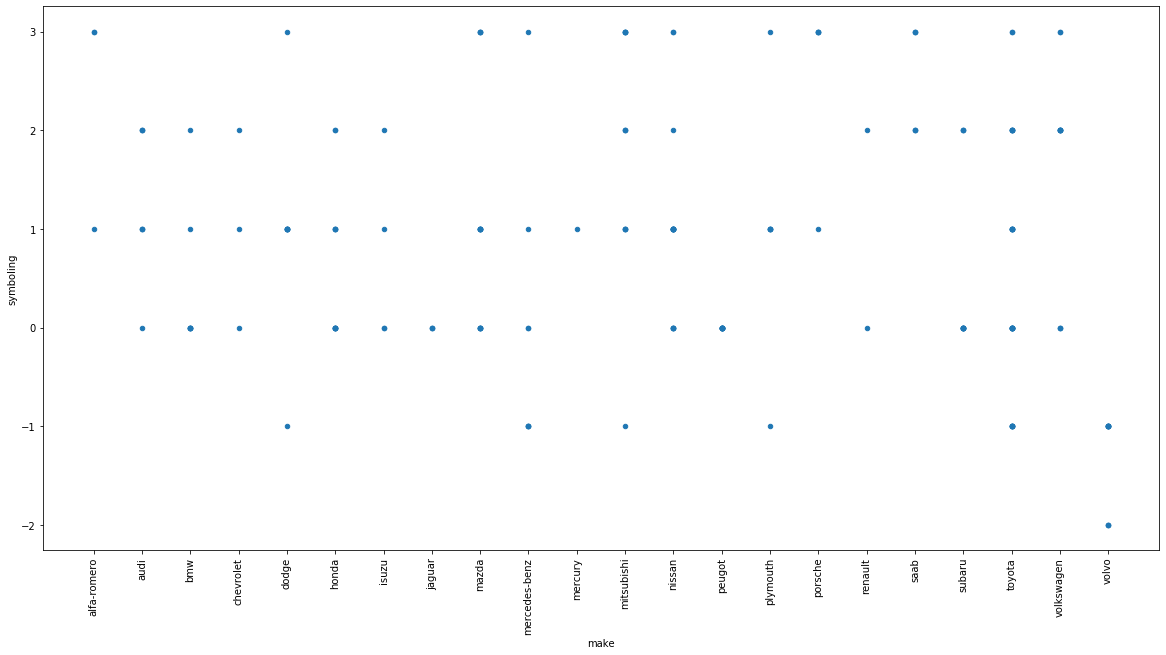

In [226]:
df.plot(kind="scatter", figsize=(20, 10), rot=90, x="make", y="symboling")    #, c="symboling", colormap="jet")

### 3D plot:
---
On this plot is shown a dependency of symboling from price and make.

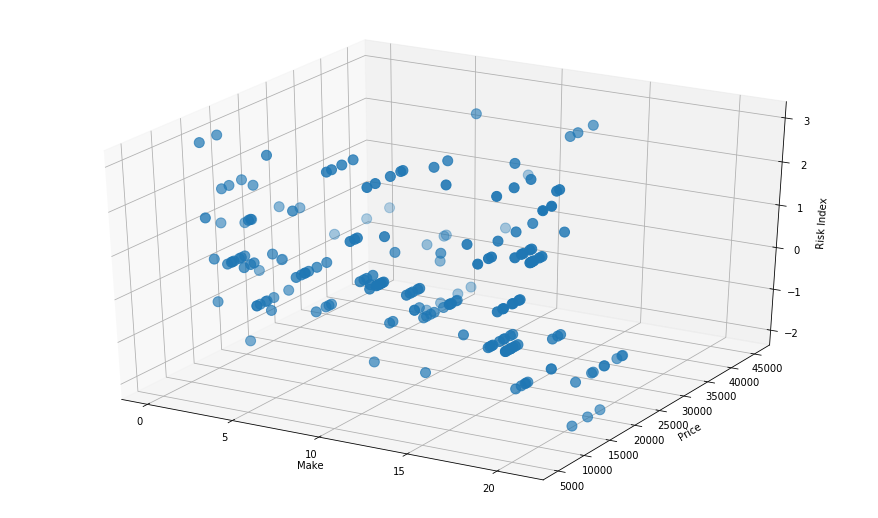

In [232]:
makes = ["alfa-romero", "audi", "bmw", "chevrolet", "dodge", "honda", "isuzu", "jaguar", "mazda", "mercedes-benz", "mercury", "mitsubishi", "nissan", "peugot", "plymouth", "porsche", "renault", "saab", "subaru", "toyota", "volkswagen", "volvo"]
viz = df.loc[:, ["make", "symboling", "price"]]
viz["make"] = viz["make"].apply(lambda x: makes.index(x))


fig = plt.figure(figsize=(12, 7))

plot = Axes3D(fig)
plot.set_xlabel("Make")
plot.set_ylabel("Price")
plot.set_zlabel("Risk Index")

x = viz["make"]
y = viz["price"]
z = viz["symboling"]

plot.scatter(x, y, z, s=100, depthshade=True)

### Pearson coefficient:

In [17]:
df.corr()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.528667,-0.625944,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.134205,-0.008965,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
normalized-losses,0.528667,1.000000,-0.408273,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.175380,0.167365,-0.036167,0.065627,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
num-of-doors,-0.625944,-0.408273,1.000000,0.437162,0.389620,0.202903,0.528343,0.200148,-0.005378,0.028701,0.122102,-0.023098,0.116988,-0.103000,-0.227394,-0.041322,-0.064732,0.057767
wheel-base,-0.531954,-0.074362,0.437162,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,-0.357612,0.023220,0.389620,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,-0.232919,0.105073,0.202903,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559204,0.182956,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,-0.541038,-0.432335,0.528343,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb-weight,-0.227691,0.119893,0.200148,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
num-of-cylinders,-0.113129,0.175380,-0.005378,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.243553,0.008578,-0.020002,0.691633,-0.124434,-0.445837,-0.466666,0.708645
engine-size,-0.105790,0.167365,0.028701,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335


### Spearman rank correlation:

In [18]:
df.corr(method="spearman")

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.527040,-0.659998,-0.537958,-0.396365,-0.253528,-0.523124,-0.256490,-0.143004,-0.176542,-0.181566,-0.015374,0.023008,-0.010032,0.284665,-0.018317,0.053316,-0.142683
normalized-losses,0.527040,1.000000,-0.418113,-0.107533,0.020539,0.114213,-0.391902,0.085896,0.112148,0.081360,-0.063747,0.092518,-0.051242,0.238695,0.298279,-0.253458,-0.196705,0.187942
num-of-doors,-0.659998,-0.418113,1.000000,0.458865,0.372992,0.217032,0.538258,0.212681,0.047281,0.081118,0.130953,-0.008524,-0.028654,-0.049210,-0.202787,0.011451,-0.027106,0.134518
wheel-base,-0.537958,-0.107533,0.458865,1.000000,0.912391,0.812300,0.632947,0.765291,0.364590,0.648305,0.540959,0.223892,-0.126268,0.503228,-0.315042,-0.492849,-0.538680,0.681790
length,-0.396365,0.020539,0.372992,0.912391,1.000000,0.888201,0.525148,0.890415,0.466376,0.782616,0.641691,0.181426,-0.192663,0.663069,-0.272322,-0.670013,-0.697949,0.810331
width,-0.253528,0.114213,0.217032,0.812300,0.888201,1.000000,0.350279,0.863815,0.466804,0.770615,0.610957,0.240672,-0.145537,0.692052,-0.200556,-0.687690,-0.700999,0.812097
height,-0.523124,-0.391902,0.538258,0.632947,0.525148,0.350279,1.000000,0.345852,0.091982,0.199811,0.226190,-0.026328,0.000231,0.009128,-0.300886,-0.068625,-0.132512,0.263806
curb-weight,-0.256490,0.085896,0.212681,0.765291,0.890415,0.863815,0.345852,1.000000,0.569328,0.877739,0.700471,0.163252,-0.219100,0.806979,-0.237866,-0.812947,-0.834385,0.913767
num-of-cylinders,-0.143004,0.112148,0.047281,0.364590,0.466376,0.466804,0.091982,0.569328,1.000000,0.691747,0.228643,0.060235,-0.136211,0.578006,-0.095233,-0.514225,-0.509110,0.574757
engine-size,-0.176542,0.081360,0.081118,0.648305,0.782616,0.770615,0.199811,0.877739,0.691747,1.000000,0.724726,0.292938,-0.234636,0.819521,-0.275199,-0.730056,-0.721342,0.828417


### One Hot Encoding:

In [32]:
pd.get_dummies(df, columns=["make"])

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,NaN,gas,std,2,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,NaN,gas,std,2,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,NaN,gas,std,2,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,2,164.0,gas,std,4,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,2,164.0,gas,std,4,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,gas,std,4,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
201,-1,95.0,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
202,-1,95.0,gas,std,4,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
203,-1,95.0,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1


## Numpy:

### Reading txt and standardizing data:

In [412]:
col_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
dtypes = "int, float, object, object, object, object, object, object, object, float, float, float, float, float, object, object, float, object, float, float, float, float, float, float, float, float"
data = np.genfromtxt("Second/imports-85.data", delimiter=",", missing_values='?', filling_values=np.nan, dtype=dtypes, names=col_names, deletechars="", converters={
    "num-of-doors": lambda x: w2n.word_to_num(x.decode("utf-8")) if x else 0,
    "num-of-cylinders": lambda x: w2n.word_to_num(x.decode("utf-8")) if x else 0
})

np.nan_to_num(data["symboling"], nan=-4, copy=False)
for col in col_names[1:]:
    np.nan_to_num(data[col], copy=False)

stringify = np.vectorize(lambda x: x.decode("utf-8"))

obj_indexes = list(i for i, x in enumerate(dtypes.split(", ")) if x == "object")
obj_indexes.remove(col_names.index("num-of-doors"))
obj_indexes.remove(col_names.index("num-of-cylinders"))

for i in obj_indexes:
    data[col_names[i]] = stringify(data[col_names[i]])

data

array([( 3,   0., 'alfa-romero', 'gas', 'std', 2, 'convertible', 'rwd', 'front',  88.6, 168.8, 64.1, 48.8, 2548., 'dohc', 4, 130., 'mpfi', 3.47, 2.68,  9.  , 111., 5000., 21., 27., 13495.),
       ( 3,   0., 'alfa-romero', 'gas', 'std', 2, 'convertible', 'rwd', 'front',  88.6, 168.8, 64.1, 48.8, 2548., 'dohc', 4, 130., 'mpfi', 3.47, 2.68,  9.  , 111., 5000., 21., 27., 16500.),
       ( 1,   0., 'alfa-romero', 'gas', 'std', 2, 'hatchback', 'rwd', 'front',  94.5, 171.2, 65.5, 52.4, 2823., 'ohcv', 6, 152., 'mpfi', 2.68, 3.47,  9.  , 154., 5000., 19., 26., 16500.),
       ( 2, 164., 'audi', 'gas', 'std', 4, 'sedan', 'fwd', 'front',  99.8, 176.6, 66.2, 54.3, 2337., 'ohc', 4, 109., 'mpfi', 3.19, 3.4 , 10.  , 102., 5500., 24., 30., 13950.),
       ( 2, 164., 'audi', 'gas', 'std', 4, 'sedan', '4wd', 'front',  99.4, 176.6, 66.4, 54.3, 2824., 'ohc', 5, 136., 'mpfi', 3.19, 3.4 ,  8.  , 115., 5500., 18., 22., 17450.),
       ( 2,   0., 'audi', 'gas', 'std', 2, 'sedan', 'fwd', 'front',  99.8, 177.3

## Visualizing:

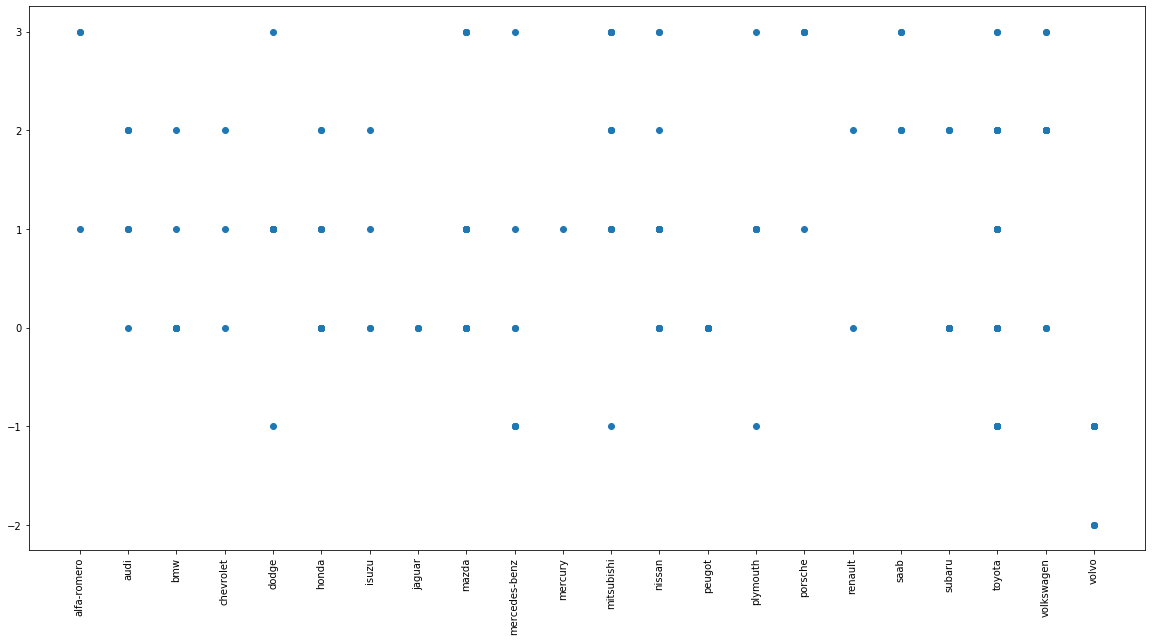

In [245]:
fig = plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plot = plt.scatter(data["make"], data["symboling"], figure=fig)

### 3D plot:

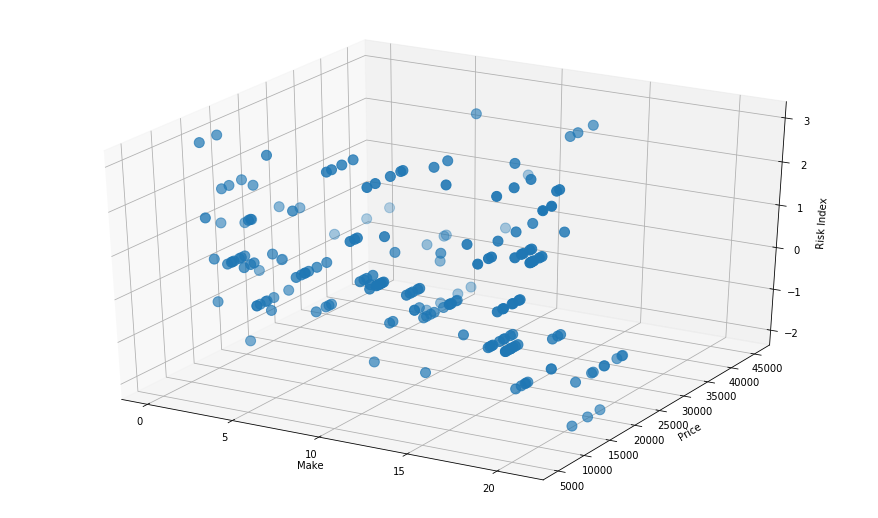

In [267]:
makes = ["alfa-romero", "audi", "bmw", "chevrolet", "dodge", "honda", "isuzu", "jaguar", "mazda", "mercedes-benz", "mercury", "mitsubishi", "nissan", "peugot", "plymouth", "porsche", "renault", "saab", "subaru", "toyota", "volkswagen", "volvo"]
indexing = np.vectorize(lambda x: makes.index(x.decode("utf-8")))

viz = data[["make", "symboling", "price"]].copy()
viz["make"] = indexing(viz["make"])

fig = plt.figure(figsize=(12, 7))

plot = Axes3D(fig)
plot.set_xlabel("Make")
plot.set_ylabel("Price")
plot.set_zlabel("Risk Index")

x = viz["make"]
y = viz["price"]
z = viz["symboling"]

plot.scatter(x, y, z, s=100, depthshade=True)

### Pearson coefficient:

In [336]:
np.corrcoef(data["symboling"], data["price"])

array([[ 1.        , -0.07146117],
       [-0.07146117,  1.        ]])

### Spearman rank correlation:

In [339]:
from scipy import stats
stats.spearmanr(data["symboling"], data["price"])

SpearmanrResult(correlation=-0.1321677156251856, pvalue=0.0588813752790171)

### One Hot Encoding:

In [413]:
unique = list(np.unique(data["make"]))
dummy = np.zeros((data.shape[0], len(unique)), dtype=np.int8)

for i in range(len(data["make"])):
    j = unique.index(data["make"][i])
    dummy[i, j] = 1

dummy

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int8)